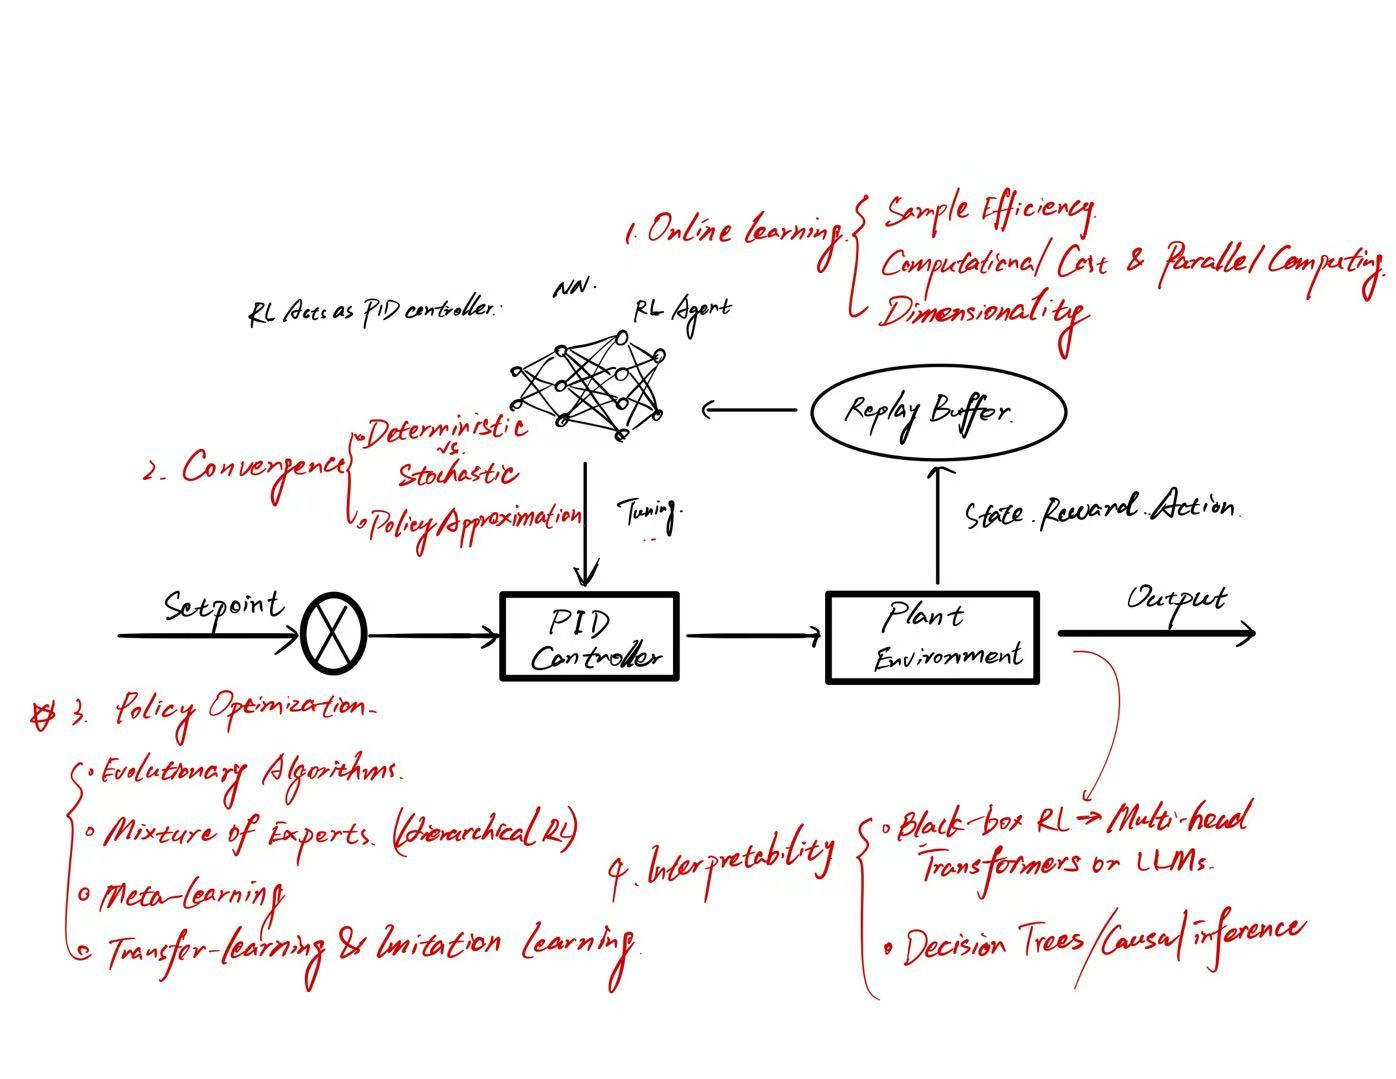

# 1. Online learning

## 1.1 Sample efficiency
How much data is enough? 

* Offline / Hybrid Approaches
  * Leverage existing log data or run historical operatting data through offline RL approaches. The agent learns a policy before actively exploring in real-time. (Learn a basic model then adjust online)

* Sim-to-Real Transfer
  * If a high-fidelity simulator (digital twin) is available, do most training offline, then fine-tune in real plant (but nearly impossible to have this digital twin).
 
* Exploration vs. Exploitation
  * For industrial processes, suboptimal or aggresive "exploration" can be costly and unsafe. Incorporate safe exploration techniques (action bounding / safe sets) is crucial.
 
## 1.2 Computational Cost and Parallel Computing
Parallel computing may be needed to handle large state spaces or to accelerate training

* High-frequency control loop constraints
  * If PID loop runs at a high sampling time, any RL-based adaptation might have strick latency constraints. Large-scale parallelization helps with policy updates --> require lightweight policies (like small Neural Nets or tabular approximations) for real-time control.
 
* Distributed or Hierarchical Control
  * Parallel RL can also be applied in multi-agent or hierarchical setups, where each sub-loop or subsystems is tuned separately and then coordinated.
 

## 1.3 Dimensionality
Higher-dimensional state/ action spaces complicate RL

* Representation Learning
  * Consider autoencoders or other dimensionality reduction methods for large sensor arrays. This can transform high-dimensional sensor data into a lower-dimensional latent space that's more amenable to RL.
 
* Sparse or Structured Actions
  * For PID tuning, sometimes the "action space" is just updates to $(K_p, K_i, K_d)$. Even for multiple loops, it might remain relatively small - unless you're applying RL to directly generate the control signal (which is great).
 

# 2. Convergence

## 2.1 Deterministic vs. Stochastic Policies
Automatica/TAC => "Deterministic Convergence"

* Stable Policy Updates
  * Deterministic Policy Gradient (DDPG) or Twin Delayed DDPG (TD3) can converge to stable solutions in continuous action spaces, but carefully tuned hyperparameters are vital.
 
* Hybrid Deterministic-Stochastic Approaches
  * Early in training, stochastic exploration may be necessary; eventually, reduce randomness to converge to a stable, deterministic policy.
 
## 2.2 Policy Approximation
Convergence depends on how well the policy is approximated (neural net); Also the First Step

* Robustness vs. Expressiveness
  * Larger networks might approximate complex dynamics but are prone to overfitting and can be less interpretable. Smaller networks or simpler function approximators (e.g., linear + basic functions) might converge more reliably. (Elegant equations are short E=mc$^2$)
 
* Adaptive Critic Design
  * If use actor-critic, the critic's approximation quality is crucial. Poor value function estimates can destablilize training.
 
* Local vs. Global Convergence
  * RL might settle in local optima, especially if the environment's reward landscape is non-convex. Might adopt curriculum learning or staged training to nagivate different plant regimes.

# 3. Policy Optimization

## 3.1 Evolutionary Algorithms
Evolutionary strategies or genetic algorithms for controller tuning. 

* Strengths:
  * Evolutionary methods are gradient-free and often handle locl minima better, especially if the environment is noisy. They can also optimize integer or discrete parameters (like PID gains in some bounded range) => optimize + control

* Limitations:
  * Pure evolutionary methods can be sample-inefficient; might combine them with gradient-based RL (RL aided EA; EA aided RL; working together)
 
## 3.2 Mixture of Experts (MoE)
Combine multiple policies, each specialized for different operating conditions

* Hierarchical RL:
  * You could have a high-level policy switch or blend among different "expert" PID tuners based on observed plant conditions.
 
* Modular vs. Ensemble:
  * Either create separate modules for different setpoints or operating modes, or have an ensemble of policies vote/average.
 
## 3.3 Meta-Learning
Learn to learn for quick adaptation

* Few-shot Adaptation
  * Industrial processes often change operating conditions or product recipes. A meta-trained RL agent can quickly retune PID gains using minimal additional data.
 
* Model-Agnostic Meta-learning (MAML):
  * Explore MAML or related methods in the control context. Start with a distribution of plants, so the agent learns an initial policy that adapts rapidly to new conditions. 

# 4. Interpretability

## 4.1 Black-Box RL => Multi-Head Transformers or LLMs
One could theoretically embed a large black-box model or even an LLM to explain control.

* Feasibility and Practicality
  * While advanced models (Transformers, LLMs) can learn complex sequences, real-time PID control demands strict letency and safety constraints. It's still an active research question if LLM-like architectures can be pruned or specialized to run safely at control-loop timescales.
 
* Interpretability Tools
  * Even if you use large neural nets, techniques like GRAD-CAM, layerwise relevance propagation, or Shapley values might help you glean which features matter.
 
* Simplified Surrogate Models
  * Another approach is to distill a trained RL policy into a more interpretable model (e.g., decision tree, rule-based system) that approximates the neural net's decisions.
 
## 4.2 Decision Trees / Causal Inference
There is interest in bridging black-box RL with causal inference

* Causal RL
  * Some research explicitly merges Pearl’s do-calculus or structural causal models with RL, letting the agent test interventions and infer causal structure. This is computationally heavier, but it may yield more interpretable or safer policies.
 
* Symbolic Regression
  * An emerging area is symbolic regression methods that can discover explicit formulas for policies. This could yield a direct PID-like relationship with interpretable terms.